In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import helpers.mab_bernoulli as brn

In [14]:
probs = [0.8, 0.6, 0.6, 0.6, 0.6]
dataAmt = [50, 50, 50, 50, 50]
opt_arm = np.max(probs)

T = 1000
samples = 200

plotNum = 3
names = ["FS", "AR", "TS"]
colors = ["red", "green", "blue"]

In [19]:
regret_vecs = [np.zeros((samples, T)) for _ in range(len(names))]

for i in tqdm(range(samples)):
    emptyData = [[] for i in range(len(probs))]
    armData = [list(np.random.binomial(1, probs[i], dataAmt[i])) for i in range(len(probs))]

    ts_reward = brn.FS_path(T, probs, brn.flat_priors(5), emptyData)
    fs_reward = brn.FS_path(T, probs, brn.flat_priors(5), armData)
    ar_reward = brn.AR_path(T, probs, brn.flat_priors(5), armData)

    regret_vecs[0][i] = np.cumsum(opt_arm - fs_reward)
    regret_vecs[1][i] = np.cumsum(opt_arm - ar_reward)
    regret_vecs[2][i] = np.cumsum(opt_arm - ts_reward)

avg_regrets = []
regret_CIs = []
for i in range(plotNum):
    avg = np.mean(regret_vecs[i], axis=0)
    avg_regrets.append(avg)
    regret_CIs.append([avg-2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples),
                       avg+2*np.std(regret_vecs[i],axis=0)/np.sqrt(samples)])

  0%|          | 0/200 [00:00<?, ?it/s]

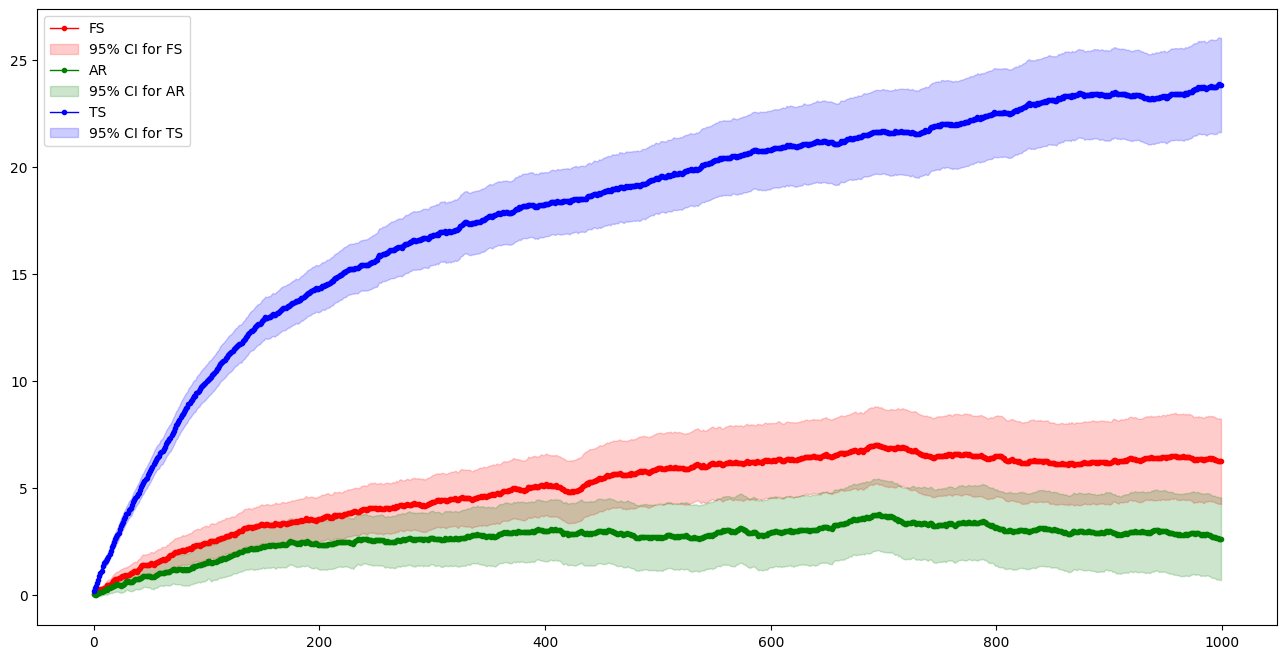

In [18]:
c = np.arange(T)
plt.rcParams["figure.figsize"] = (16,8)
for i in range(plotNum):
  plt.plot(c,avg_regrets[i],'.-',label=names[i],linewidth=1,color=colors[i])
  plt.fill_between(c, regret_CIs[i][0][:],regret_CIs[i][1][:],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
plt.legend()

In [11]:
T = 500
samples = 50

plotNum = 3
names = ["FS", "AR", "TS"]
colors = ["red", "green", "blue"]

In [24]:
goodArm = 0.8
otherArms = 0.6
h = int(np.sqrt(T))
maxArms = 15

avg_regrets = [[] for i in range(plotNum)]
regret_CIs = [np.zeros((2, maxArms-1)) for i in range(plotNum)]

for K in tqdm(range(1, maxArms)):
  probs = [otherArms for _ in range(K-1)]
  probs.append(goodArm)
  dataAmt = [h for _ in range(K)]
  opt_arm = np.max(probs)

  regrets = [[] for _ in range(plotNum)]

  for i in tqdm(range(samples), leave = False):
    armData = [list(np.random.binomial(1, probs[i], dataAmt[i])) for i in range(len(probs))]

    emptyData = [[] for i in range(len(probs))]
    ts_reward = brn.FS(T, probs, brn.flat_priors(K), emptyData)
    fs_reward = brn.FS(T, probs, brn.flat_priors(K), armData)
    ar_reward = brn.AR(T, probs, brn.flat_priors(K), armData)

    regrets[0].append(opt_arm * T - fs_reward)
    regrets[1].append(opt_arm * T - ar_reward)
    regrets[2].append(opt_arm * T - ts_reward)

  for j in range(plotNum):
    avg = np.mean(regrets[j])
    avg_regrets[j].append(avg)
    regret_CIs[j][0][K-1] = avg-2*np.std(regrets[j])/np.sqrt(samples)
    regret_CIs[j][1][K-1] = avg+2*np.std(regrets[j])/np.sqrt(samples)


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Total Regret as a function of arms (good arm has mean=0.8, all others have mean=0.6)')

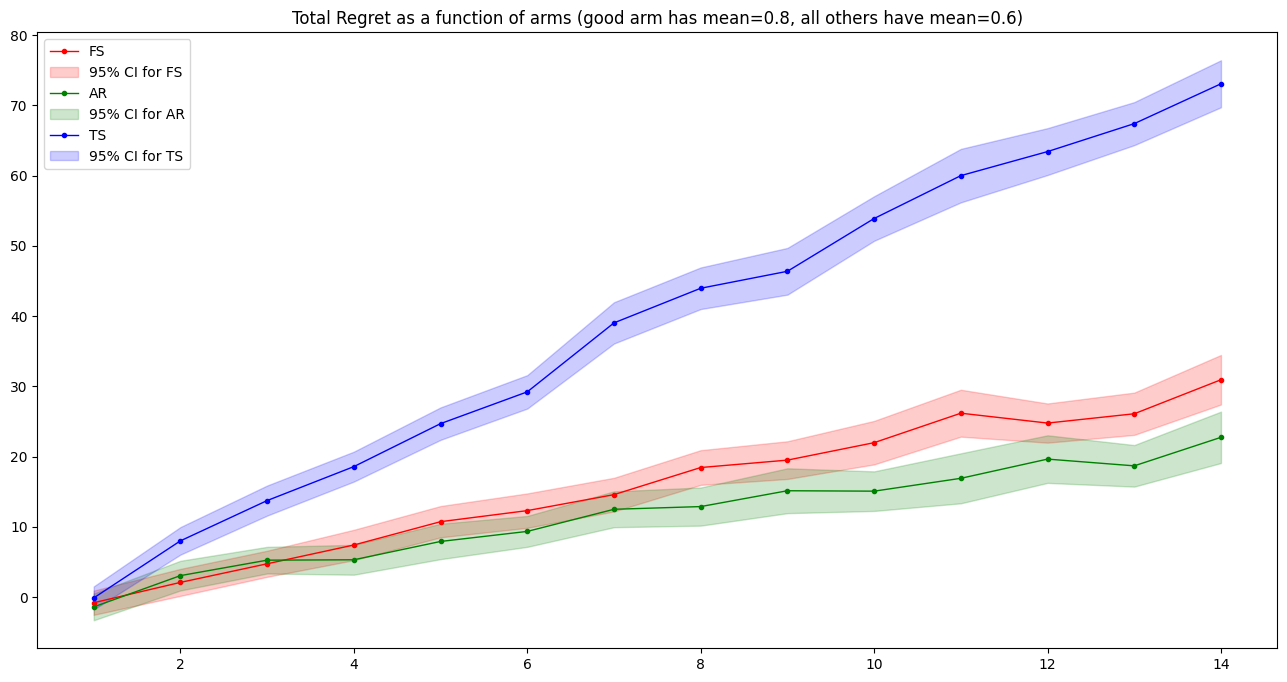

In [26]:
c = range(1, maxArms)
plt.rcParams["figure.figsize"] = (16,8)
#print(len(regret_CIs[0][0]))
for i in range(plotNum):
  plt.plot(c,avg_regrets[i],'.-',label=names[i],linewidth=1,color=colors[i])
  plt.fill_between(c, regret_CIs[i][0],regret_CIs[i][1],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
plt.legend()
plt.title("Total Regret as a function of arms (good arm has mean=" + str(goodArm)+", all others have mean="+str(otherArms)+")")
#data on good arm .8

Text(0.5, 1.0, 'FS-AR over arms (good arm has mean=0.8, all others have mean=0.6)')

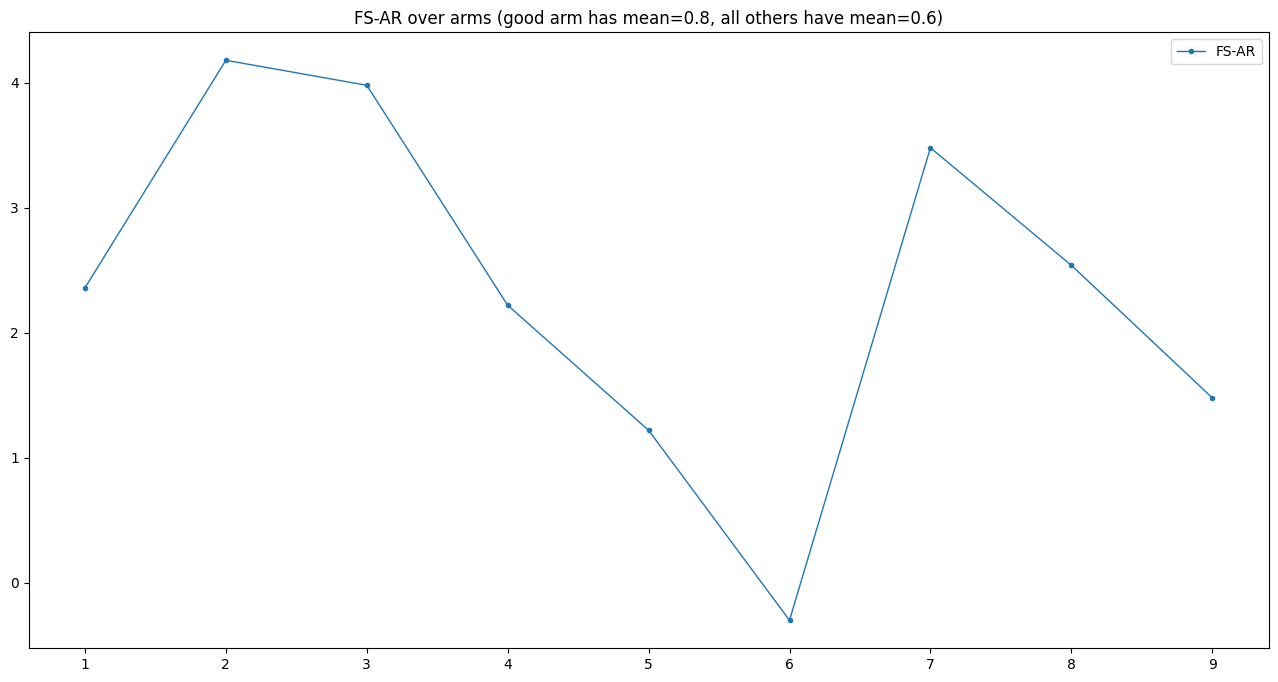

In [14]:
c = range(1, maxArms)
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(c,np.array(avg_regrets[0]) - np.array(avg_regrets[1]),'.-',label="FS-AR",linewidth=1)
#plt.fill_between(c, regret_CIs[i][0],regret_CIs[i][1],alpha=0.2,label='95% CI for '+ names[i],color=colors[i])
plt.legend()
plt.title("FS-AR over arms (good arm has mean=" + str(goodArm)+", all others have mean="+str(otherArms)+")")
#data on good arm .8